In [19]:
import sklearn.datasets as sk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data=sk.fetch_california_housing()
# Create a DataFrame from the data
ca_housing = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target column to the DataFrame
ca_housing['Target'] = data.target

# Display the first few rows of the DataFrame
ca_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


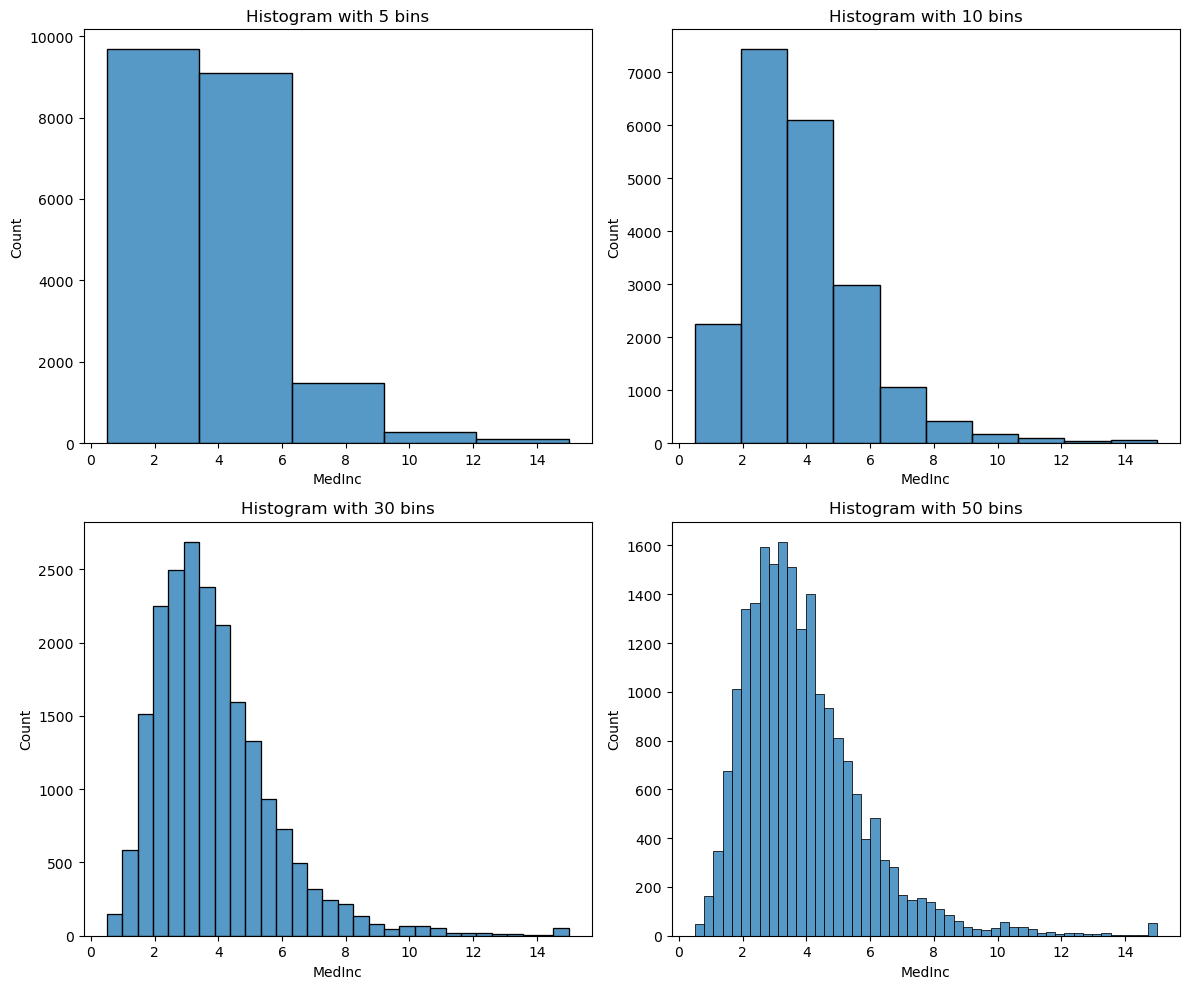

In [20]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

bins=[5,10,30,50]

# Flatten the axs array for easy iteration
axs = axs.flatten()

for i, bin_size in enumerate(bins):
    sns.histplot(ca_housing['MedInc'], bins=bin_size, ax=axs[i])
    axs[i].set_title(f'Histogram with {bin_size} bins')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

# Observation

1.Distribution Shape: As the number of bins increases, we can observe more details in the distribution of median income. With fewer bins, the histogram appears more smoothed out, while with more bins, we see finer details and fluctuations in the distribution.

2.Peak Density: With fewer bins, it's easier to identify the general peak density or mode of the distribution. As the number of bins increases, the peaks become sharper, allowing for a more precise identification of the most common income ranges.

3.Outlier Detection: With a higher number of bins, it becomes easier to detect potential outliers or unusual spikes in the income distribution. For example, in the histogram with 50 bins, we may notice some isolated spikes indicating higher-income ranges that are not as evident in histograms with fewer bins.

Overall, the histograms show that the "MedInc" column is positively skewed, with a higher density of values towards the lower income ranges.
The distribution appears to be right-skewed, indicating that lower income ranges are more common compared to higher income ranges.

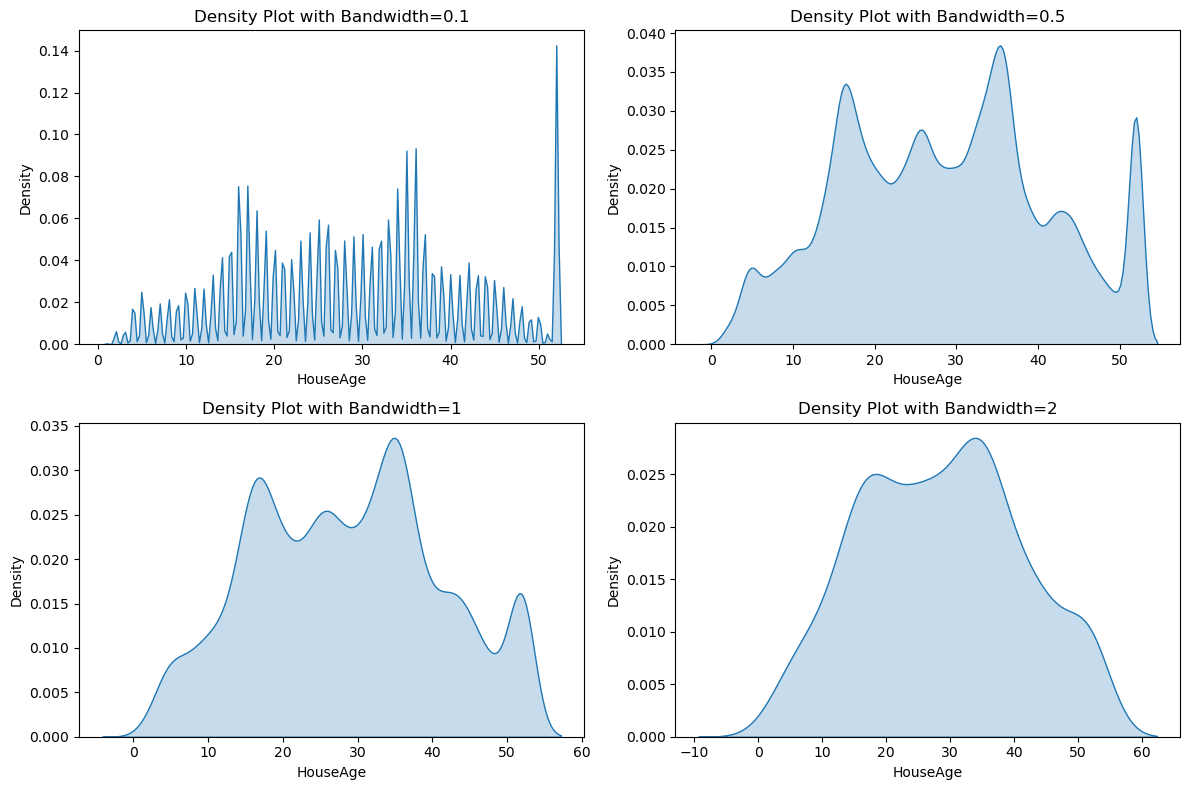

In [21]:
# Create subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

bw_adjustments = [0.1, 0.5, 1, 2]

# Flatten the axs array for easy iteration
axs = axs.flatten()

for i, bw in enumerate(bw_adjustments):
    sns.kdeplot(ca_housing['HouseAge'], bw_adjust=bw, ax=axs[i], fill=True)
    axs[i].set_title(f'Density Plot with Bandwidth={bw}')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

# Observation

1.Smoothing Effect: Lower bandwidth result in density plots with sharper peaks and narrower curves. This indicates less smoothing of the data, allowing for finer details to be captured in the distribution of house ages.

2.Peak Detection: As the bandwidth increases, the density plots become smoother, and the peaks become broader and less pronounced. This can make it more challenging to identify the exact locations of peak densities or modes within the distribution.

3.Distribution Spread: Higher bandwidths tend to produce density plots with wider curves, indicating a broader spread of house ages in the dataset. Conversely, lower bandwidth adjustments result in density plots with narrower curves, suggesting a more concentrated distribution of house ages around specific values.

Bandwidth 0.1: With a very small bandwidth, the density plot shows more fluctuations and captures finer details in the distribution of 'HouseAge'. This can result in a more jagged appearance and may overfit the data, capturing noise along with the underlying distribution.

Bandwidth 0.5: As the bandwidth increases, the density plot becomes smoother while still retaining some level of detail in the distribution. This bandwidth strikes a balance between capturing the underlying pattern of 'HouseAge' and avoiding excessive noise.

Bandwidth 1: With a bandwidth of 1, the density plot is even smoother, providing a clearer representation of the overall shape of the distribution while smoothing out smaller fluctuations. This bandwidth may offer a good compromise between detail and smoothness.

Bandwidth 2: At a larger bandwidth, the density plot becomes even smoother, but it may oversimplify the distribution by averaging out some of the finer details. This can result in a loss of information about specific peaks or modes in the data.

Overall, the choice of bandwidth affects the trade-off between bias and variance in the density estimate. Smaller bandwidths tend to have lower bias but higher variance, capturing more details and potential noise in the data. In contrast, larger bandwidths have higher bias but lower variance, resulting in smoother estimates but potentially oversimplifying the underlying distribution. The choice of bandwidth should be carefully considered based on the characteristics of the data and the goals of the analysis.

Overall Distribution:

The density plots suggest that the distribution of "HouseAge" in the California housing dataset is multimodal, with multiple peaks or modes at different ages.
The choice of bandwidth adjustment affects the visualization of these modes and the perceived smoothness of the distribution.

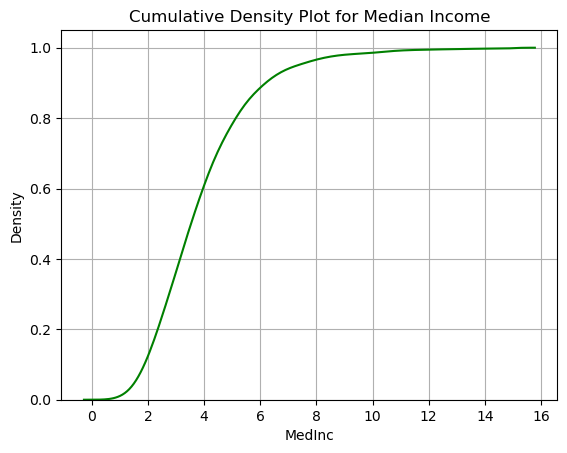

In [22]:
# Plot cumulative density plot for "MedInc" column
sns.kdeplot(ca_housing['MedInc'], cumulative=True, color='green')
plt.title('Cumulative Density Plot for Median Income')
plt.grid(True)

In [17]:
# URL of the CSV file
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

# Load the CSV file into a DataFrame
wine_quality = pd.read_csv(url, sep=';')

# Display the first few rows of the DataFrame
wine_quality.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Skewness of Residual Sugar: 4.536394788805638


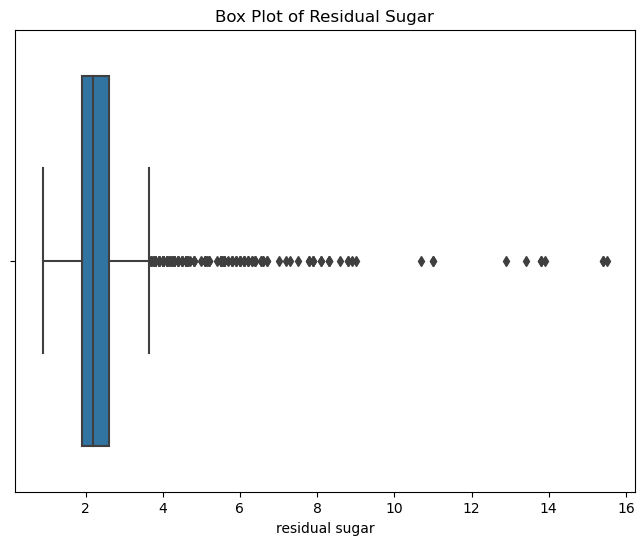

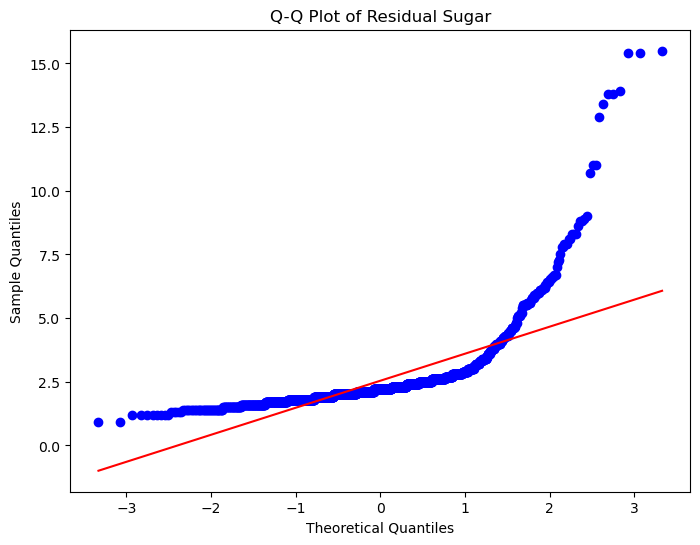

In [13]:
from scipy.stats import skew, probplot

#Skewness of residual sugar column
residual_sugar_skewness = skew(wine_quality['residual sugar'])

print("Skewness of Residual Sugar:", residual_sugar_skewness)

#Box plot for the "residual sugar" column
plt.figure(figsize=(8, 6))
sns.boxplot(data=wine_quality, x='residual sugar')
plt.title('Box Plot of Residual Sugar')

#Q-Q plot for residual sugar column
plt.figure(figsize=(8, 6))
probplot(wine_quality['residual sugar'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Residual Sugar')

# Show the plots
plt.show()



# Observation

1.Box Plot:  The box plot of the "residual sugar" data shows potential outliers and the spread of the data. The distribution appears skewed, with a longer tail on the right side, the data is positively skewed.The box plot provides information about the central tendency, variability, and potential outliers of the "residual sugar" column.It shows the median, quartiles, and range of the residual sugar values. Additionally, the points outside the whiskers are outliers. 

2.Q-Q Plot: The Q-Q plot compares the quantiles of the residual sugar values against the quantiles of a theoretical normal distribution. If the data points fall approximately along the diagonal line, it suggests that the residuals follow a normal distribution, so from the figure we can see that the data is not normally distributed, and there are outliers. The Q-Q plot of the "residual sugar" data shows a departure from normality. The data points deviate from the diagonal line, particularly at the tails, indicating non-normality.

3.Skewness: Skewness of Residual Sugar: 4.536394788805638. The skewness of the "residual sugar" data is likely positive, given the longer tail on the right side observed in the box plot.

Skewness of Residual Sugar: 1.8051683835042431


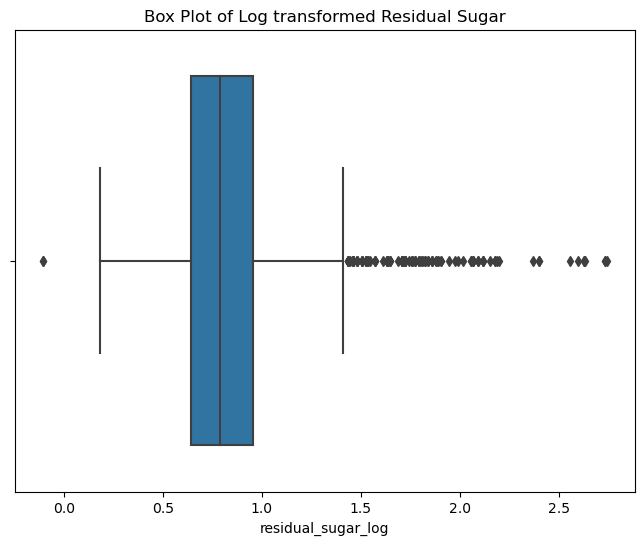

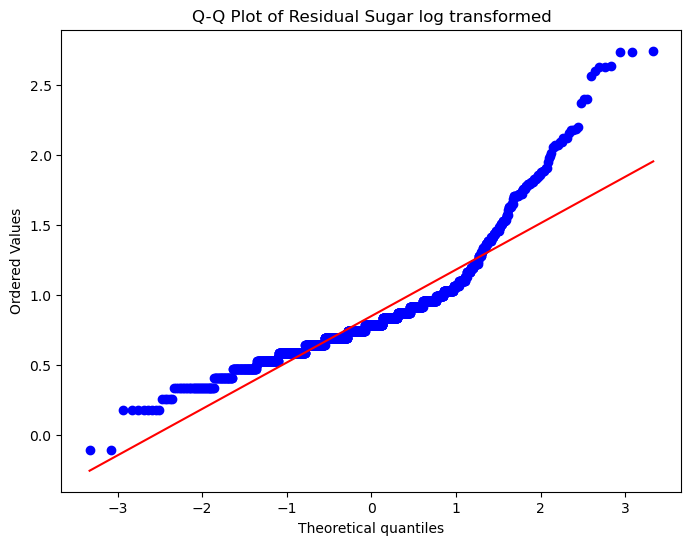

In [15]:
import numpy as np

#Log transformation
wine_quality['residual_sugar_log'] = np.log(wine_quality['residual sugar'])

#Skewness of residual sugar column
residual_sugar_skewness = skew(wine_quality['residual_sugar_log'])

print("Skewness of Residual Sugar:", residual_sugar_skewness)

#Box plot for the "residual sugar" column
plt.figure(figsize=(8, 6))
sns.boxplot(data=wine_quality, x='residual_sugar_log')
plt.title('Box Plot of Log transformed Residual Sugar')

#Q-Q plot for residual sugar column
plt.figure(figsize=(8, 6))
probplot(wine_quality['residual_sugar_log'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Residual Sugar log transformed')

# Show the plots
plt.show()

# Observation

1.Box-Plot: The box plot of the log-transformed "residual sugar" data indicates a different distribution,  potentially with fewer outliers and a different spread. The spread of the data seems to be compressed, and potential outliers are shifted towards lower values. The transformed data appears to have a more symmetrical distribution.

2.Q-Q Plot: The Q-Q plot of the log-transformed "residual sugar" data provides insights into its approximate normality.The Q-Q plot of the log-transformed "residual sugar" data suggests an approximate normal distribution. The data points closely follow the diagonal line, indicating a closer fit to normality.

3.The skewness has reduced after the log transformation. The skewness is 1.8051683835042431 which is still positive skew, it indicates that the transformation has helped reduce the asymmetry in the data.

Overall, the log transformation appears to have compressed the spread of the data, reduced skewness, and brought the distribution closer to normality, as evidenced by the box plots and Q-Q plots.